# Analysis of CrowdFlower job #767273: abstract-level CID verification task for BioCreative V Task 3 final evaluation

Tong Shu Li<br>
Created on: Wednesday 2015-08-19<br>
Last updated: 2015-08-19

Here we aggregate the results of the abstract level CID verification task for the final evaluation for BioCreative V.

Job #767273 details

Parameter | Value
--- | ---
Job ID | #767273
Rows per page | 6
Judgements per row | 5
Payment per page | 24 cents USD
Payment per row | 4 cents USD
Minimum CrowdFlower contributor level | 2
Minimum time per page | 60 seconds
Maximum judgements per worker | No cap (limited by test questions only)
Minimum worker accuracy threshold | 70%
Acceptable answer distribution | No limits
Number of test questions | 234 total, 6 were disabled
Test question origin | 
Date of launch | 5:14 pm 2015-08-18 Pacific Daylight Time
Date of completion | 12:25 am 2015-08-19 Pacific Daylight Time
Total cost before bonuses | \$851.04 USD
Total cost after bonuses | $851.04 USD

---

In [1]:
from collections import defaultdict
from IPython.display import Image
import datetime as dt
import matplotlib as plt
import numpy as np
import os
import pandas as pd
import pycountry

In [2]:
matplotlib inline

In [3]:
from src.filter_data import filter_data
from src.aggregate_results import *

In [4]:
def convert_time(text):
    """
    Given the time in CrowdFlower's output format,
    convert it to a Python datetime object.
    CrowdFlower time stamps are in UTC.
    
    CrowdFlower timestamps have the following format:
    
    month/day/year hour:minute:second
    
    Example:
    
    8/2/2015 00:26:24
    """
    return dt.datetime.strptime(text, "%m/%d/%Y %H:%M:%S")

def time_elapsed(start, stop):
    """
    Given two Python datetime objects, determines the number
    of seconds between those two times.
    """
    seconds = int((stop - start).total_seconds())
    assert seconds >= 0
    return seconds

def determine_time_taken(dataframe):
    """
    Given a dataframe with the responses from one worker,
    determines the time taken for one page of work.
    """
    def time_taken_wrapper(row):
        return time_elapsed(row[0], row[1])
    
    if dataframe.empty:
        return pd.Series()
    
    time_taken = dataframe[["_started_at", "_created_at"]].apply(time_taken_wrapper, axis = 1)
    return time_taken

def time_stats(time_series):
    """
    Given the time taken for each individual work unit,
    determines some stats.
    """
    return (time_series.min(), time_series.median(), time_series.max())

def get_country_name(code):
    if isinstance(code, str):
        return pycountry.countries.get(alpha3 = code).name.split(",")[0]
    
    # code is missing (NaN)
    return "unknown"

### Worker analysis

In [5]:
loc = "data/crowdflower/results"
fname = "job_767273_worker_summary.csv"
worker_data = pd.read_csv(os.path.join(loc, fname), sep = ',')

In [6]:
# add a column that tells us if a worker was flagged
worker_data["flagged"] = worker_data["flagged_at"].map(lambda x: isinstance(x, str))

In [7]:
worker_data.shape

(769, 19)

In [8]:
worker_data.head()

,worker_id,external_id,judgments_count,missed_count,golds_count,forgiven_count,channel,country,region,city,last_ip,flagged_at,rejected_at,bonus,flag_reason,trust_overall,submission_rate,level_2_contributors,flagged
0,1899559,2166645,0,0,0,0,prodege,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1.0000,0,1,False
1,2112439,3098740,18,1,8,0,prodege,USA,OK,Norman,162.228.151.72,NaN,NaN,0,NaN,0.8750,360,1,False
2,2253549,3174334,0,0,0,0,prodege,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1.0000,0,1,False
3,3626598,94399,30,1,10,0,prodege,CAN,ON,Sault Sainte Marie,70.51.131.135,NaN,NaN,0,NaN,0.9000,360,1,False
4,4688131,DanicaWong,42,4,12,0,zoombucks,CAN,BC,Vancouver,75.157.35.92,NaN,NaN,0,NaN,0.6667,360,1,False


### Quiz stats:

In [9]:
# total workers:
len(worker_data)

769

In [10]:
# zero judgments (gave up immediately?)
len(worker_data.query("judgments_count == 0"))

344

In [11]:
# made at least one judgement
len(worker_data.query("judgments_count > 0"))

425

In [12]:
# saw only the quiz
len(worker_data.query("judgments_count == 6"))

176

In [13]:
# saw some real work (passed initial quiz)
len(worker_data.query("judgments_count > 6"))

249

In [14]:
# saw only the quiz and passed, but did no real work
len(worker_data.query("judgments_count == 6 and trust_overall >= 0.7"))

27

In [15]:
# failed the initial quiz
len(worker_data.query("judgments_count == 6 and trust_overall < 0.7"))

149

In [16]:
# eventually failed out of the job
len(worker_data.query("judgments_count > 6 and trust_overall < 0.7"))

25

In [17]:
# had good trust score but was kicked out due to weird answer distribution
len(worker_data.query("judgments_count > 6 and trust_overall >= 0.7 and flagged"))

0

In [18]:
# had good trust score but was kicked out due to weird answer distribution
good_workers = worker_data.query("judgments_count > 6 and trust_overall >= 0.7 and ~flagged")
print(len(good_workers))

224


---

### Statistics about the good workers

In [19]:
good_workers.head()

,worker_id,external_id,judgments_count,missed_count,golds_count,forgiven_count,channel,country,region,city,last_ip,flagged_at,rejected_at,bonus,flag_reason,trust_overall,submission_rate,level_2_contributors,flagged
1,2112439,3098740,18,1,8,0,prodege,USA,OK,Norman,162.228.151.72,NaN,NaN,0,NaN,0.8750,360,1,False
3,3626598,94399,30,1,10,0,prodege,CAN,ON,Sault Sainte Marie,70.51.131.135,NaN,NaN,0,NaN,0.9000,360,1,False
8,6333422,3274588,60,1,15,0,clixsense,PHL,B2,Cagayan De Oro,49.147.185.131,NaN,NaN,0,NaN,0.9333,360,1,False
12,6347548,3525054,30,2,10,0,clixsense,IND,28,Kolkata,116.202.201.75,NaN,NaN,0,NaN,0.8000,360,1,False
20,6591664,3801006,48,1,13,0,clixsense,MEX,09,Mexico,189.178.215.37,NaN,NaN,0,NaN,0.9231,360,1,False


In [20]:
good_worker_ids = set(good_workers["worker_id"])

### Where did the good workers come from?

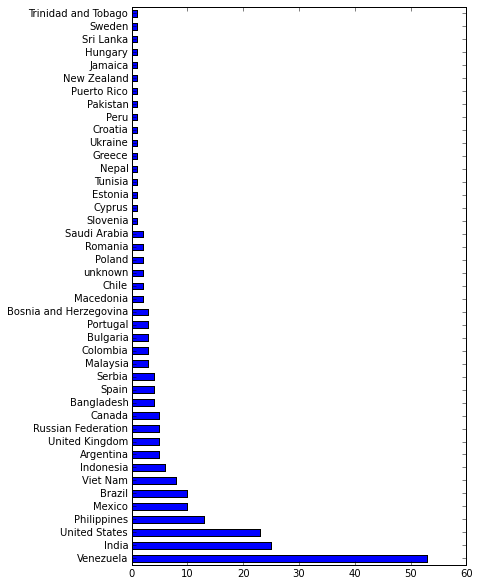

In [21]:
good_workers["country"].map(get_country_name).value_counts().plot(kind = "barh", figsize = (6, 10))

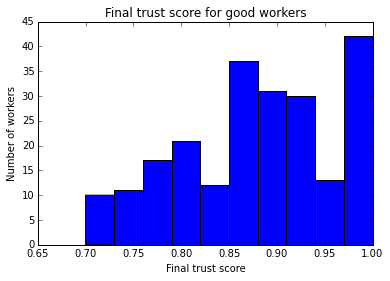

In [22]:
graph = good_workers["trust_overall"].plot(kind = "hist", title = "Final trust score for good workers")
graph.set_ylabel("Number of workers")
graph.set_xlabel("Final trust score")

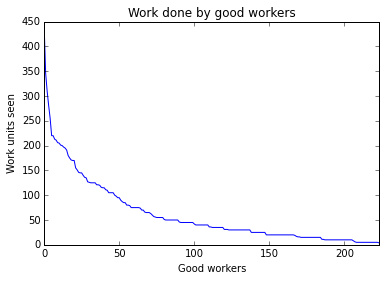

In [23]:
# plot the amount of work done by the good workers
# only count real work units, not the test questions
work_done = good_workers[["judgments_count", "golds_count"]].apply(lambda v: v["judgments_count"] - v["golds_count"], axis = 1)

graph = pd.Series(sorted(work_done, reverse = True)).plot(title = "Work done by good workers")
graph.set_ylabel("Work units seen")
graph.set_xlabel("Good workers")

## Results

In [24]:
settings = {
    "loc": "data/crowdflower/results",
    "fname": "job_767273_full_with_untrusted.csv",
    "data_subset": "all",
    "min_accuracy": 0.0,
    "max_accuracy": 1.0,
    "dtype": {}
}

# all data collected
all_raw_data = filter_data(settings)

In [25]:
settings = {
    "loc": "data/crowdflower/results",
    "fname": "job_767273_full_with_untrusted.csv",
    "data_subset": "normal",
    "min_accuracy": 0.7,
    "max_accuracy": 1.0,
    "dtype": {"pmid": int}
}

# all data collected
work_raw_data = filter_data(settings)

In [26]:
work_raw_data.shape

(13854, 29)

In [27]:
work_raw_data.head()

,_unit_id,_created_at,_golden,_id,_missed,_started_at,_tainted,_channel,_trust,_worker_id,...,disease_id,disease_name,form_abstract,form_title,old_cf_work_unit_id,original_job_id,pmid,uniq_id,verify_relationship_gold,verify_relationship_gold_reason
3139,773935842,8/19/2015 03:02:00,False,1715159386,NaN,8/19/2015 02:59:14,False,clixsense,0.8148,9336290,...,MESH:D006948,"<span class=""disease"">hyperactivity</span>",We investigated the effect of repeated treatme...,Some central effects of repeated treatment wit...,NaN,767241,2576810,bcv_hard_all_data_test_ques_pos_138,yes_direct,NaN
3140,773935842,8/19/2015 03:16:43,False,1715165268,NaN,8/19/2015 03:00:17,False,neodev,0.9167,33254158,...,MESH:D006948,"<span class=""disease"">hyperactivity</span>",We investigated the effect of repeated treatme...,Some central effects of repeated treatment wit...,NaN,767241,2576810,bcv_hard_all_data_test_ques_pos_138,yes_direct,NaN
3197,773935846,8/19/2015 02:35:46,False,1715148852,NaN,8/19/2015 02:04:36,True,neodev,0.8000,29658778,...,MESH:D000647,"<span class=""disease"">amnesia</span>",The aim of this study was to assess the effica...,"Antagonism of <span class=""chemical"">diazepam<...",NaN,767241,3120485,bcv_hard_all_data_test_ques_pos_142,yes_direct,"Diazepam is used during surgery, but it has ma..."
5519,773935948,8/19/2015 01:42:54,False,1715104433,NaN,8/19/2015 01:40:39,False,neodev,0.9130,29847126,...,MESH:D003693,"<span class=""disease"">delirium</span>","Famotidine is a <span class=""chemical"">histami...","Famotidine-associated <span class=""disease"">de...",NaN,NaN,0,bcv_final_eval_hard_0,NaN,NaN
5520,773935948,8/19/2015 01:43:00,False,1715104563,NaN,8/19/2015 01:40:34,False,neodev,0.8182,33732804,...,MESH:D003693,"<span class=""disease"">delirium</span>","Famotidine is a <span class=""chemical"">histami...","Famotidine-associated <span class=""disease"">de...",NaN,NaN,0,bcv_final_eval_hard_0,NaN,NaN


In [28]:
work_raw_data["_tainted"].value_counts()

False    13853
True         1
dtype: int64

In [29]:
work_data = work_raw_data.query("~_tainted")

In [30]:
work_data.shape

(13853, 29)

In [31]:
work_votes = defaultdict(set)
for uniq_id, group in work_data.groupby("uniq_id"):
    work_votes[len(group["_worker_id"].unique())].add(uniq_id)
    
for votes, units in work_votes.items():
    print("Judgements {0}, # of work units: {1}".format(votes, len(units)))

Judgements 2, # of work units: 1
Judgements 5, # of work units: 2709
Judgements 6, # of work units: 51


The one work unit with two votes was a test question that was turned off halfway through. The ones with 5 or 6 votes are the real work units.

In [32]:
work_data = work_data.query("uniq_id in {0}".format(list(work_votes[5] | work_votes[6])))

In [33]:
work_data.shape

(13851, 29)

In [34]:
len(work_data["uniq_id"].unique())

2760

---

### Worker trust over time

In [35]:
def trust_over_time(dataframe):
    res = defaultdict(list)

    list_size = 0
    for worker_id, resp in dataframe.groupby("_worker_id"):
        cum_seen = 0
        cum_missed = 0
        for fin_time, page in resp.groupby("_created_at"):
            seen = page["_golden"].sum()
            missed = page["_missed"].sum()
            
            if np.isnan(missed):
                missed = 0
                
            cum_seen += seen
            cum_missed += missed
            res[worker_id].append(1 - cum_missed / cum_seen)
            
        list_size = max(list_size, len(res[worker_id]))
        
    temp = dict()
    for worker_id, values in res.items():
        temp[worker_id] = values + [np.nan] * (list_size - len(values))
        
    return pd.DataFrame(temp)

In [36]:
temp = all_raw_data.query("_worker_id in {0}".format(list(good_worker_ids)))

In [37]:
temp.loc[:, "_created_at"] = temp.loc[:, "_created_at"].map(convert_time)
temp.loc[:, "_started_at"] = temp.loc[:, "_started_at"].map(convert_time)

/usr/lib64/python3.4/site-packages/pandas/core/indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [38]:
timeres = trust_over_time(temp)

In [39]:
timeres.head()

,2112439,3626598,6333422,6347548,6591664,7690577,9336290,9383666,9559045,9832767,...,33732804,33770137,33803732,33845842,33859798,33871848,33897090,33899112,33920312,33975182
0,0.833333,0.833333,0.833333,0.833333,1.000000,0.833333,1,0.833333,1,0.833333,...,0.833333,0.833333,1,1,1.000000,0.833333,0.833333,1,1,0.833333
1,0.857143,0.857143,0.857143,0.857143,1.000000,0.857143,1,0.857143,1,0.857143,...,0.857143,0.714286,1,1,0.857143,0.857143,0.857143,1,1,0.857143
2,0.875000,0.875000,0.875000,0.875000,0.875000,0.875000,1,0.875000,1,0.875000,...,0.875000,0.750000,1,1,0.750000,0.875000,0.875000,1,1,NaN
3,NaN,0.888889,0.888889,0.888889,0.888889,0.888889,1,0.777778,1,0.888889,...,0.777778,0.777778,1,1,0.777778,0.888889,NaN,1,NaN,NaN
4,NaN,0.900000,0.900000,0.800000,0.900000,0.800000,1,NaN,1,0.900000,...,0.800000,0.800000,1,1,0.700000,0.900000,NaN,1,NaN,NaN


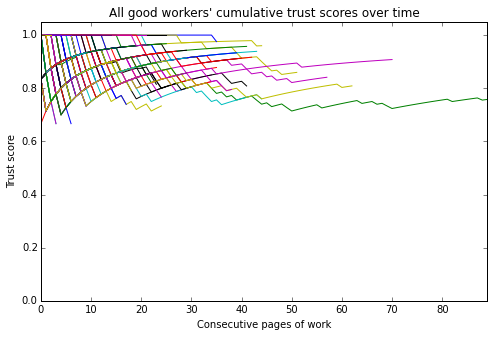

In [40]:
graph = timeres.plot(legend = False, figsize = (8, 5),
            title = "All good workers' cumulative trust scores over time")

graph.set_ylim((0, 1.05))
graph.set_xlabel("Consecutive pages of work")
graph.set_ylabel("Trust score")

---

## Result aggregation

The abstract-level task was a simple binary vote of whether the shown relationship was true according to the passage. Therefore we do not need to do the vote mapping.

In [41]:
# take positive votes only, indirect is no
res = aggregate_results("uniq_id", "verify_relationship", work_data,
                        "positive_signal_only",
                        ["pmid", "_unit_id", "chemical_id", "disease_id"],
                        "yes_direct")

In [42]:
res.loc[:, ["pmid", "unit_id"]] = res.loc[:, ["pmid", "unit_id"]].astype(int)

In [43]:
res.shape

(5368, 9)

In [44]:
len(res["uniq_id"].unique())

2760

In [45]:
res.head()

,uniq_id,verify_relationship,conf_score,num_votes,percent_agree,pmid,unit_id,chemical_id,disease_id
0,bcv_final_eval_hard_0,yes_direct,0.8182,1,0.198438,0,773935948,MESH:D006632,MESH:D003693
1,bcv_final_eval_hard_0,no_relation,3.3050,4,0.801562,0,773935948,MESH:D006632,MESH:D003693
0,bcv_final_eval_hard_1,yes_direct,0.0000,0,0.000000,1,773935949,MESH:D000809,MESH:D007022
0,bcv_final_eval_hard_1,no_relation,4.4691,5,1.000000,1,773935949,MESH:D000809,MESH:D007022
0,bcv_final_eval_hard_10,yes_direct,0.0000,0,0.000000,5,773935958,MESH:D013498,MESH:D003556


In [46]:
res_pos_only = res.query("verify_relationship == 'yes_direct'")

In [47]:
res_pos_only.shape

(2760, 9)

In [48]:
res_pos_only.head()

,uniq_id,verify_relationship,conf_score,num_votes,percent_agree,pmid,unit_id,chemical_id,disease_id
0,bcv_final_eval_hard_0,yes_direct,0.8182,1,0.198438,0,773935948,MESH:D006632,MESH:D003693
0,bcv_final_eval_hard_1,yes_direct,0.0000,0,0.000000,1,773935949,MESH:D000809,MESH:D007022
0,bcv_final_eval_hard_10,yes_direct,0.0000,0,0.000000,5,773935958,MESH:D013498,MESH:D003556
0,bcv_final_eval_hard_100,yes_direct,0.0000,0,0.000000,21,773936048,MESH:D000431,MESH:D012893
0,bcv_final_eval_hard_1000,yes_direct,0.0000,0,0.000000,200,773936948,MESH:D004837,MESH:D009202


### Internal consistency check:

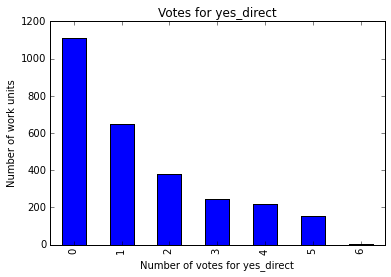

In [49]:
graph = res_pos_only["num_votes"].value_counts().plot(kind = "bar", title = "Votes for yes_direct")

graph.set_ylabel("Number of work units")
graph.set_xlabel("Number of votes for yes_direct")

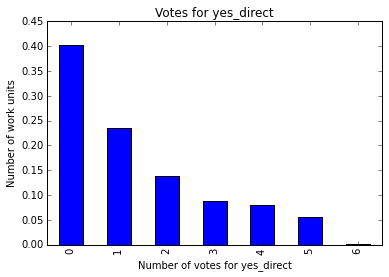

In [50]:
graph = res_pos_only["num_votes"].value_counts(normalize = True).plot(kind = "bar", title = "Votes for yes_direct")

graph.set_ylabel("Number of work units")
graph.set_xlabel("Number of votes for yes_direct")

Looking at the graph above shows that around 60% of the relations received 4 or 5 of 5 no_relation votes. Only 15% of the work units received 4 or more yes_direct votes. We will also be not including the ones with 2 or 3 positive votes, as those are likely to lower our F-score.

### Write results to file

We will make two files: one where we write all relations with our percent_agree as the normalized confidence score, and another where we only take the ones where we had >= 4 positive votes as our set.

In [51]:
res_pos_only.to_csv("data/final_eval/results/abstract_relation_res.tsv", sep = '\t', index = False)